In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# PRELIMINARY ANALYSIS

In [2]:
df = pd.read_csv('F:/PGP-DSE/Capstone/Dataset/bank/bank-full.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
print(df.shape)
print(df.dtypes)

(45211, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [4]:
# Print the number of unique values in each column

print(df.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [5]:
# We convert the 'day' column to an object datatype since it's non-numerical

df['day'] = df['day'].astype('object')
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day          object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
# Make the list of continuous and categorical columns

num_col = ['age','balance','duration','campaign','pdays','previous']
cat_col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']
target_col = ['y']

In [7]:
# Print the statistical summary of numerical columns 

df_cat = df[cat_col]
df_num = df[num_col]

df_num.describe()

# We can observe that for the columns 'previous' & 'pdays', values upto the 75th percentile
# are '0' and '-1' respectively (high right skewness)
# Similarly, for the campaign column, upto 75th percentile, values belong to {1,2,3}

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Print the statistical summary of categorical columns 

df_cat.describe()

,job,marital,education,default,housing,loan,contact,day,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,31,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,2752,13766,36959


In [9]:
# Now, let's check the number of missing values in each columns and no of duplicate rows 

print(df.isnull().sum())

# From the preliminary analysis, there are no null values in the dataset (np.nan)
# However we need to check whether there are missing values in the non standard format by
# analyzing each column in detail.

print('\nTotal no of duplicate rows =',df.duplicated().sum())

# There are no duplicated rows in the data set as well. .

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Total no of duplicate rows = 0


#  **UNIVARIATE ANALYSIS**

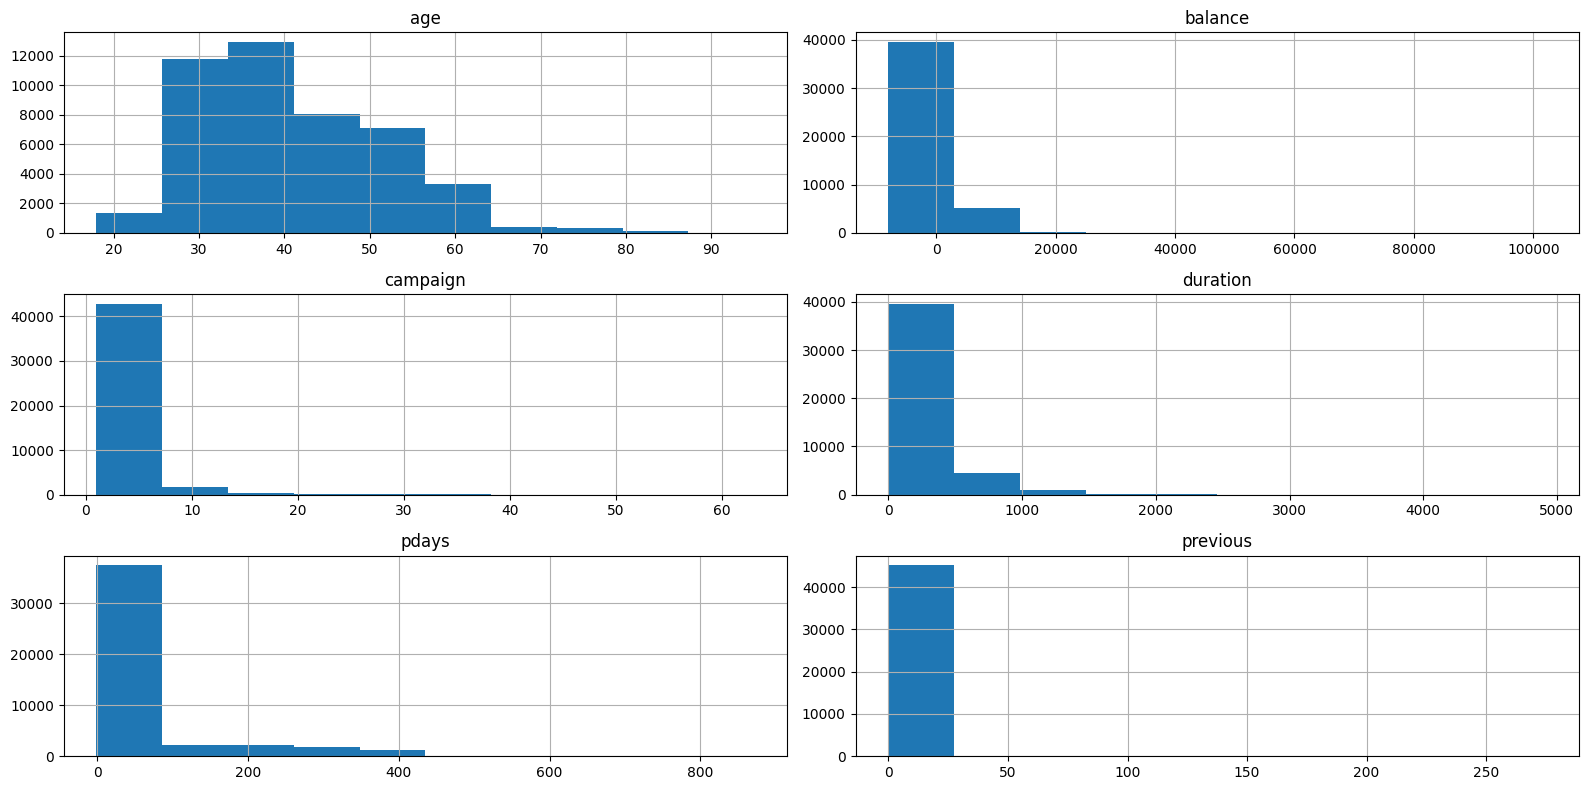

In [10]:
# Now let's check the distribution of the numeric columns in the data

df_num.hist(figsize=(16,8))
plt.tight_layout()
plt.show()

In [11]:
# OBSERVATIONS
# 1. Except age, all other variables skew highly to the right.
# 2. Columns 'campaign', 'previous' & 'pdays' show a low degree of variation 
# with most of the value in pdays being '-1' and in previous being '0'

# Questions
# Should 'day' and 'month' be treated as categorical/numerical ?
# Should 'campaign', 'pdays' and 'previous' be treated as categorical/numerical ?

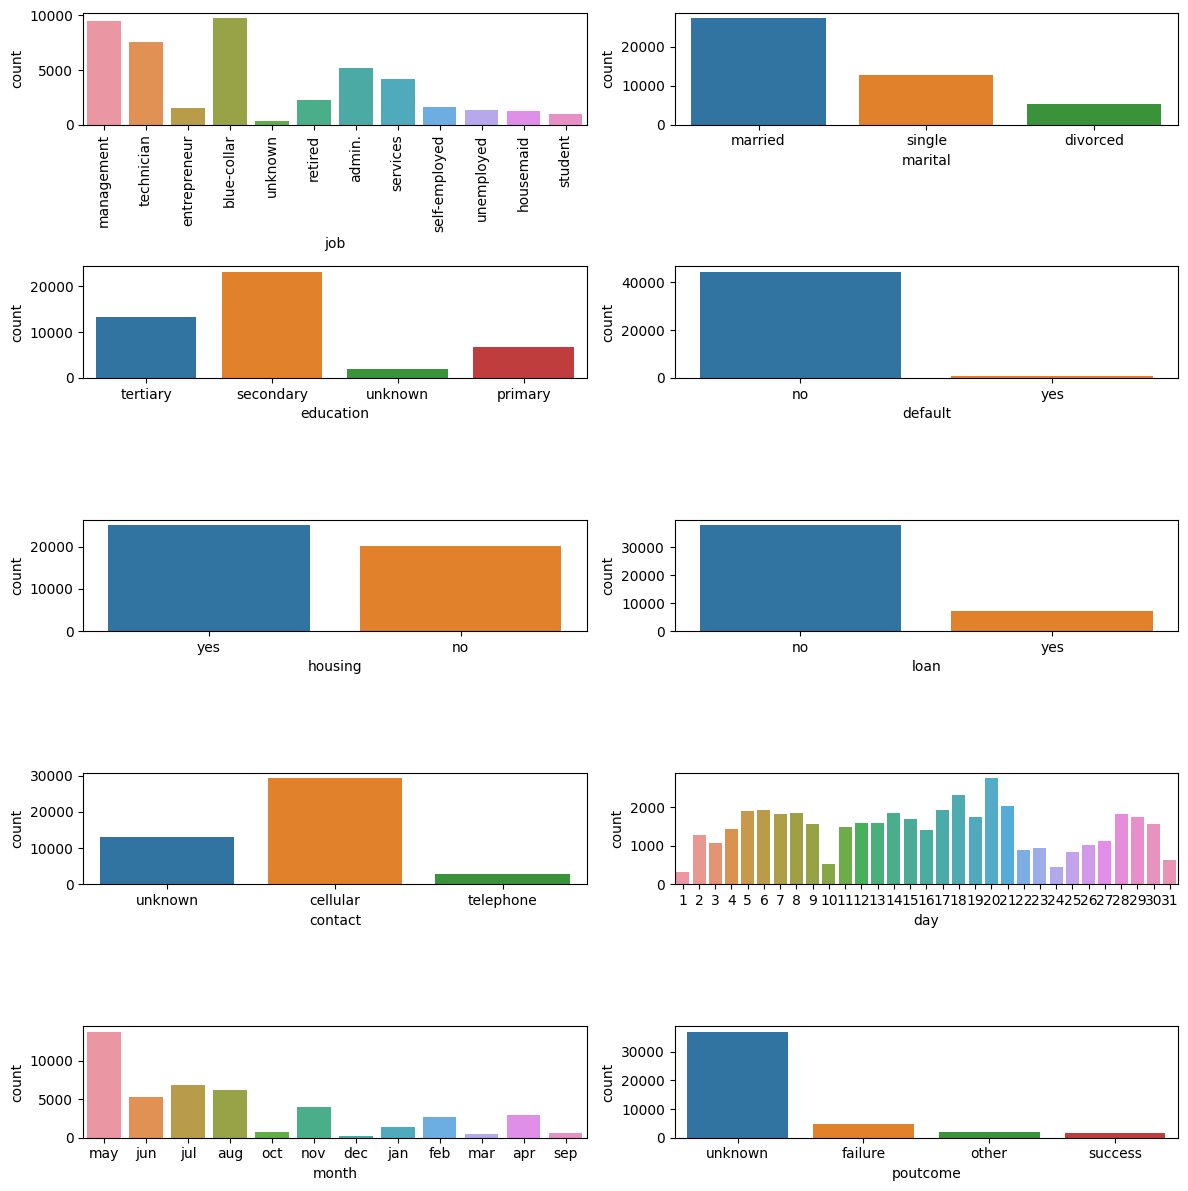

In [12]:
# Now, moving to the categorical variables, let's see the distribution of different classes
# within each of the categorical columns.

fig, axes = plt.subplots(5,2, figsize=(12,12))
for i in range(1,11):
    sns.countplot(x = cat_col[i-1], data=df_cat, ax=axes.flat[i-1])
    
ax1 = axes.flat[0]
labels = ax1.get_xticklabels()
ax1.set_xticklabels(labels = labels, rotation=90)

plt.tight_layout()
plt.show()

In [13]:
pd.set_option('display.max_rows', 100)
counts = pd.DataFrame(df_cat[cat_col].melt(var_name='column', value_name='value').groupby('column')['value'].value_counts())
counts

value
column    value               
contact   cellular       29285
          unknown        13020
          telephone       2906
day       20              2752
          18              2308
          21              2026
          17              1939
          6               1932
          5               1910
          14              1848
          8               1842
          28              1830
          7               1817
          19              1757
          29              1745
          15              1703
          12              1603
          13              1585
          30              1566
          9               1561
          11              1479
          4               1445
          16              1415
          2               1293
          27              1121
          3               1079
          26              1035
          23               939
          22               905
          25               840
          31               643
          10               524
          24               447
          1                322
default   no             44396
          yes              815
education secondary      23202
          tertiary       13301
          primary         6851
          unknown         1857
housing   yes            25130
          no             20081
job       blue-collar     9732
          management      9458
          technician      7597
          admin.          5171
          services        4154
          retired         2264
          self-employed   1579
          entrepreneur    1487
          unemployed      1303
          housemaid       1240
          student          938
          unknown          288
loan      no             37967
          yes             7244
marital   married        27214
          single         12790
          divorced        5207
month     may            13766
          jul             6895
          aug             6247
          jun             5341
          nov             3970
          apr             2932
          feb             2649
          jan             1403
          oct              738
          sep              579
          mar              477
          dec              214
poutcome  unknown        36959
          failure         4901
          other           1840
          success         1511

In [14]:
# OBSERVATIONS

# Observe that 'loan' and 'default' columns are highly imbalanced with majority of 'no' class.
# Largest no of clients are from blue-collar, management & technician classes
# Largest no of clients have secondary education, followed by tertiary and primary.
# Largest no are married, followed by single and divorces
# Most frequent mode of contact is through cellphone.
# 'poutcome' column is imbalanced with majority of 'unknown' class


# MISSING / UNKNOWN DATA 

# Job column has 288 'unknown' values
# Education column has 1857 'unknown' values
# Contact columns has significant no of 'unknown' values (13020)
# 'poutcome' is 'unknown' a majority of clients (36959), showing that either this is the first campaign
# where they are contacted or a lot of missing values. If it's the latter, we have to figure out 
# how to deal with missing values

### **OUTLIER ANALYSIS**

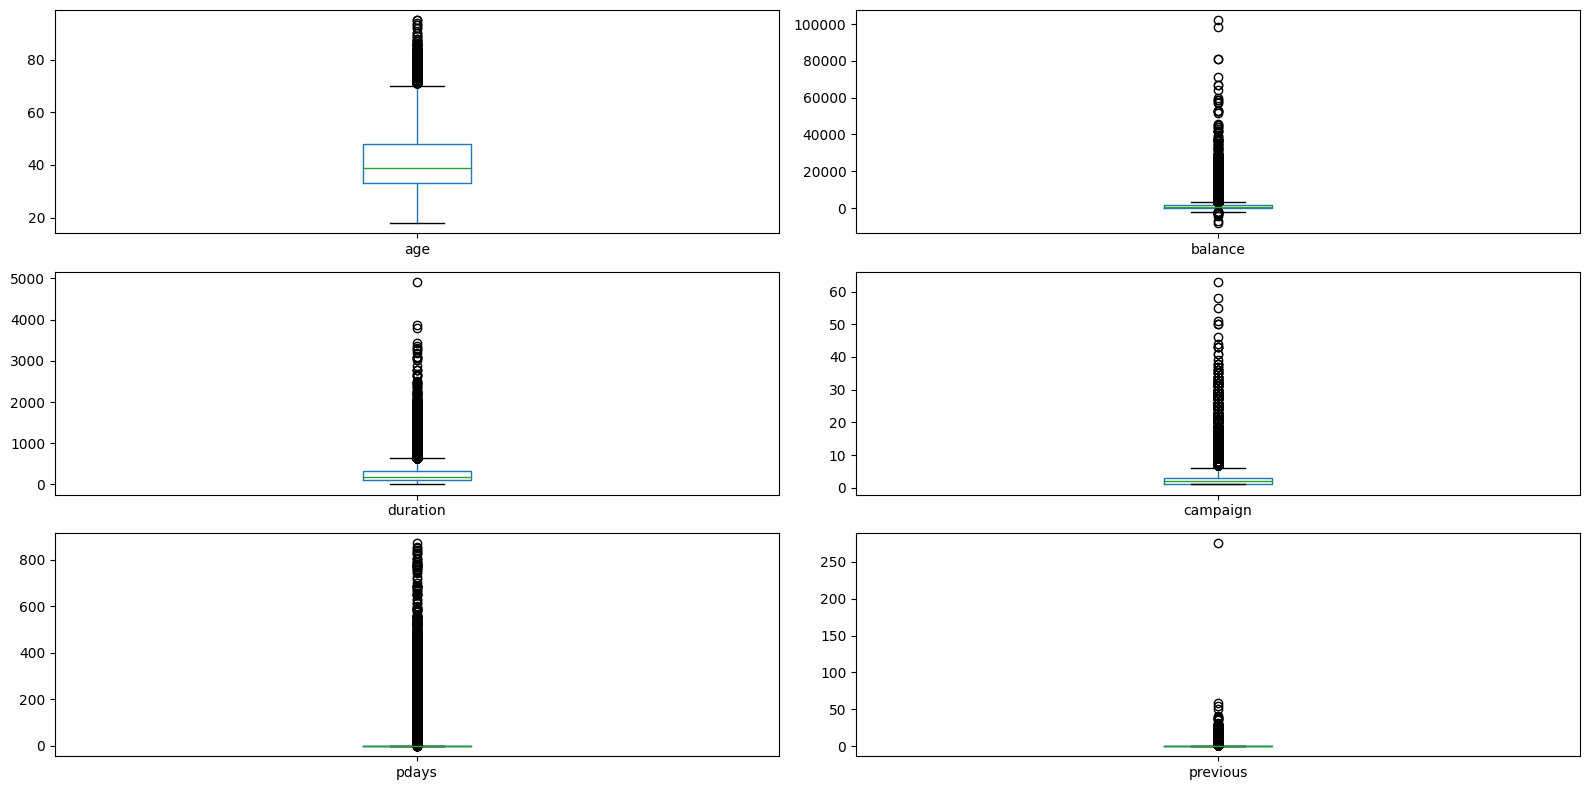

In [15]:
# Box plot of numeric variables 

pd.reset_option('display.max_rows')
df_num.plot(kind='box', figsize=(16,8), subplots=True, layout = (3,2))
plt.tight_layout()
plt.show()

# We note that except age, all other variables have large no of outliers (right skewing).

In [16]:
df[num_col].skew()

# All numerical columns are highly skewed except 'age' column

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

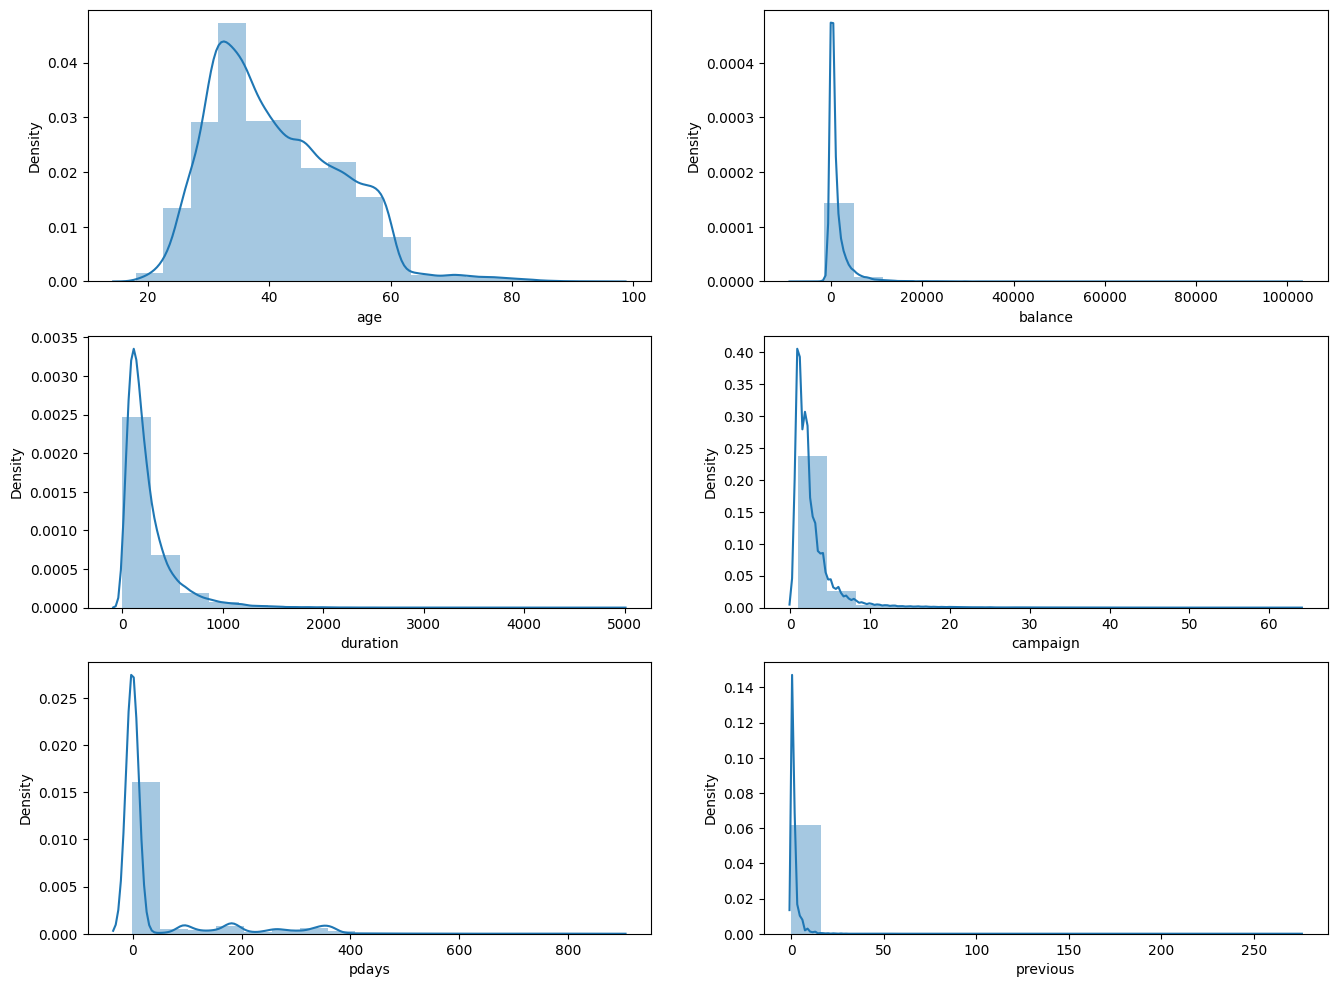

In [17]:
# Let's see the dist plots of skewed variables in more detail

fig, axes = plt.subplots(3,2, figsize=(16,12))

for i in range(6): 
    bin_edges = np.histogram_bin_edges(df_num[num_col[i]], bins = 'sturges')
    sns.distplot(df_num[num_col[i]], bins=bin_edges, ax = axes.flat[i])
plt.show()

In [18]:
# We are expecting the all numerical columns except 'age' will require some transformation
# to improve model performance

# MULTIVARIATE ANALYSIS 
### RELATIONSHIP BETWEEN FEATURES

In [19]:
# Let's start by checking the correlation matrix for the dataframe to obtain the degree of
# correlation between the numerical variables.

corr_mat = df_num.corr()
corr_mat

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000


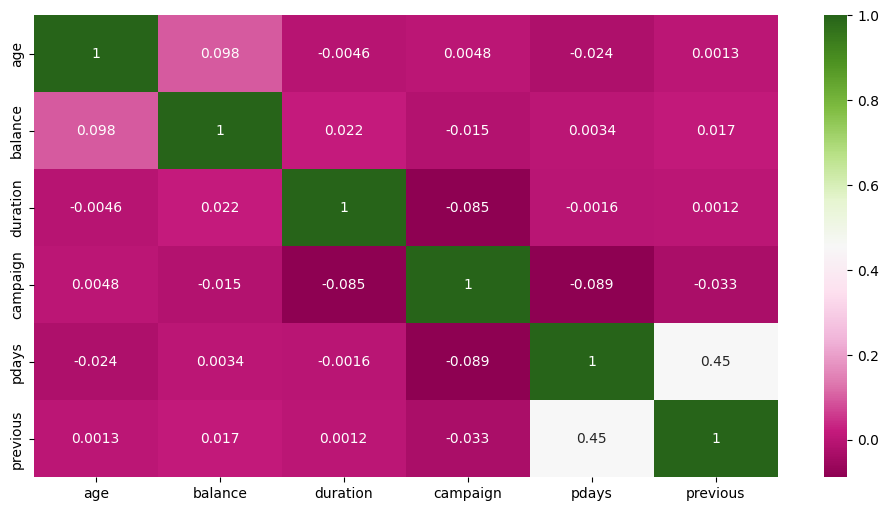

In [20]:
# Plotting a heat map of the same

plt.figure(figsize=(12,6))
sns.heatmap(corr_mat, annot=True, cmap='PiYG')
plt.show()

# The only columns that possess a significant correlation with each other are 'previous' and 'pdays' (0.45)

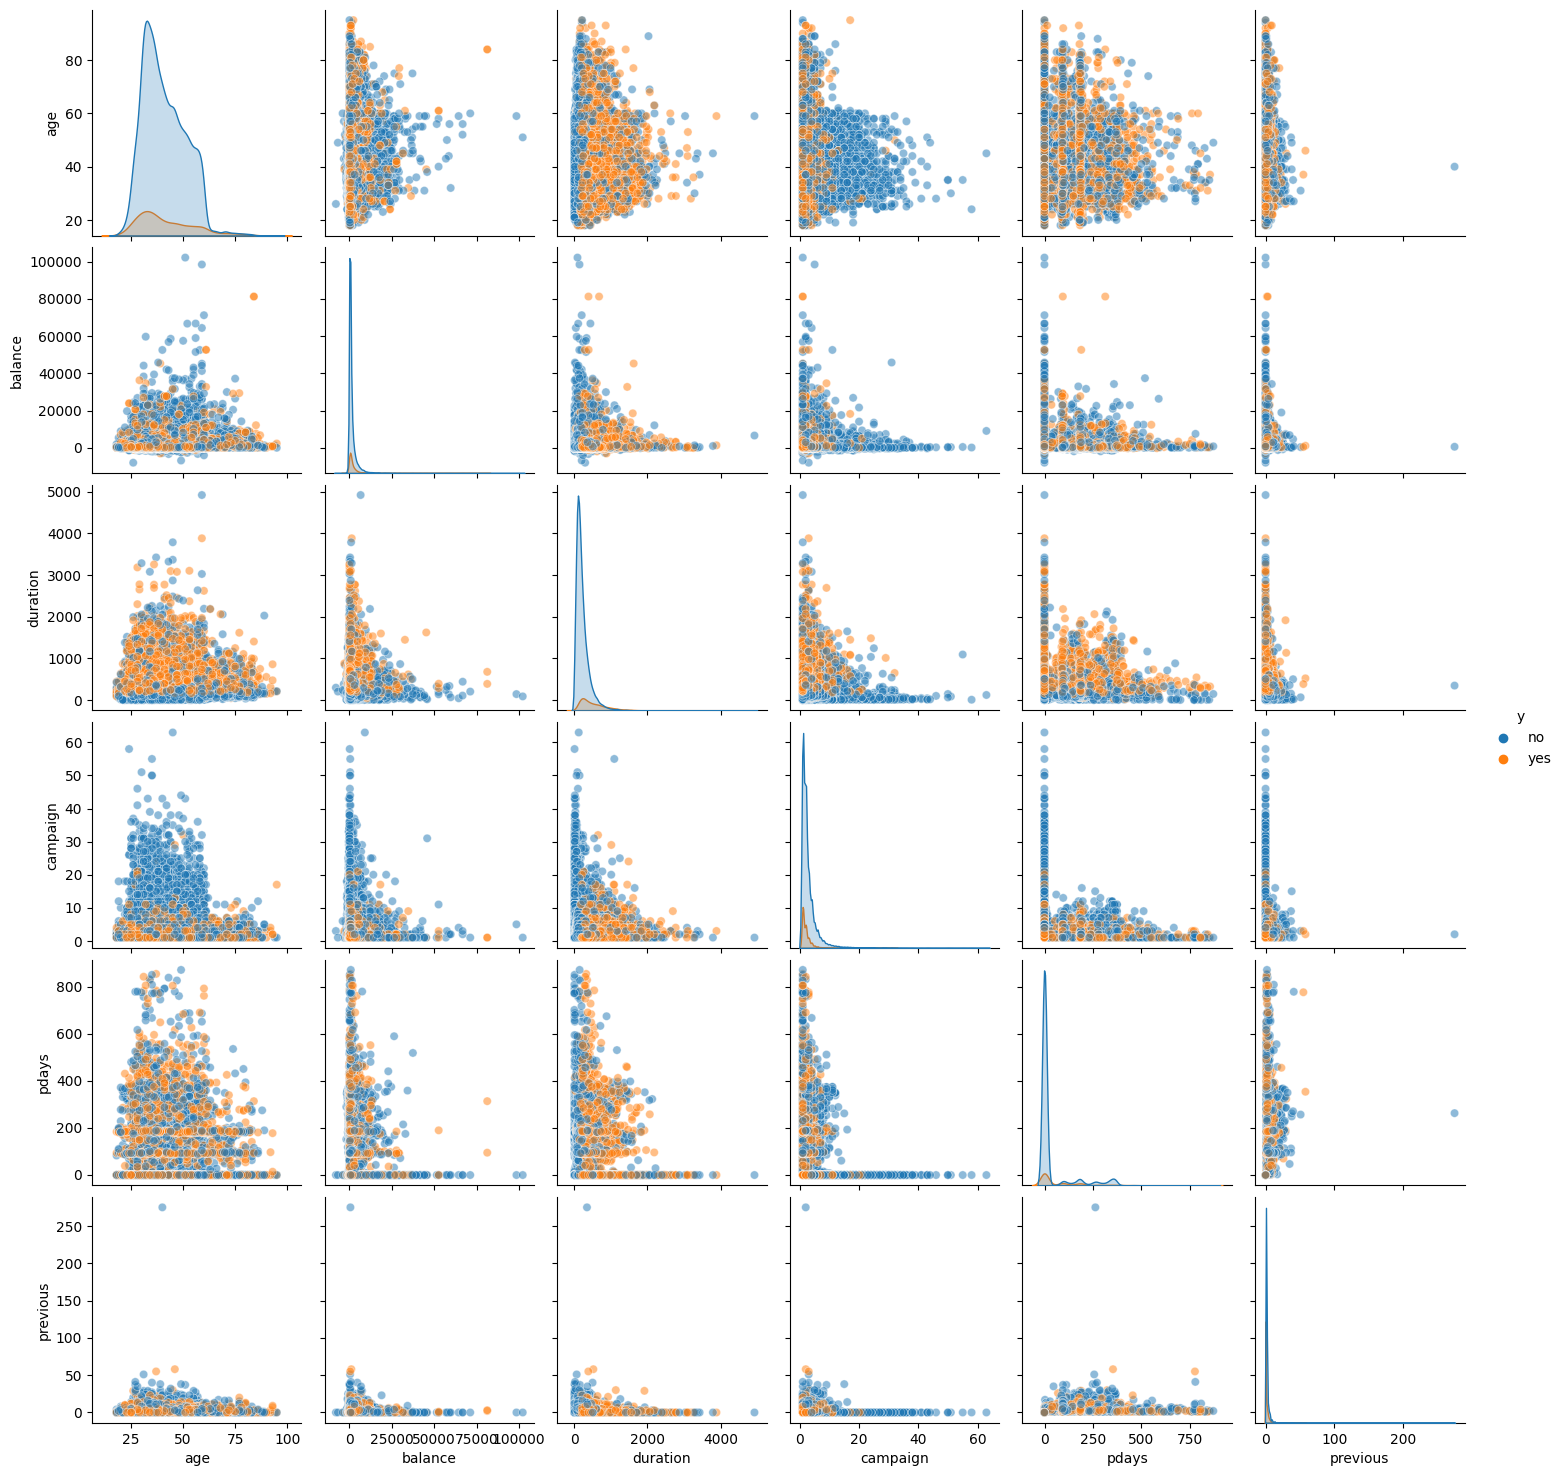

In [21]:
# Scatter plots between pairs of numerical variables to visualize their relationship

col_list = num_col + ['y']
sns.pairplot(data = df[col_list], hue = 'y', plot_kws={"alpha":0.5})
plt.show()

# Again it's seen that none of the columns show any significant correlation with each other
# Also, we see a fairly uniform distribution of yes/no outcomes (visualized by red/orange dots)
# for most columns 

In [22]:
# We can observe that all the columns of numerical data show no correlation with each other
# Only exception is 'pdays' and 'previous' which have a correlation of 0.45
# Thus, multicollinerality assumption is satisfied for the data

### FEATURE-TARGET RELATIONSHIP

In [23]:
# Distribution of target variable in dataset

df['y'].value_counts().to_frame()

# Target variable is highly unbalanced with 88% no cases.

,y
no,39922
yes,5289


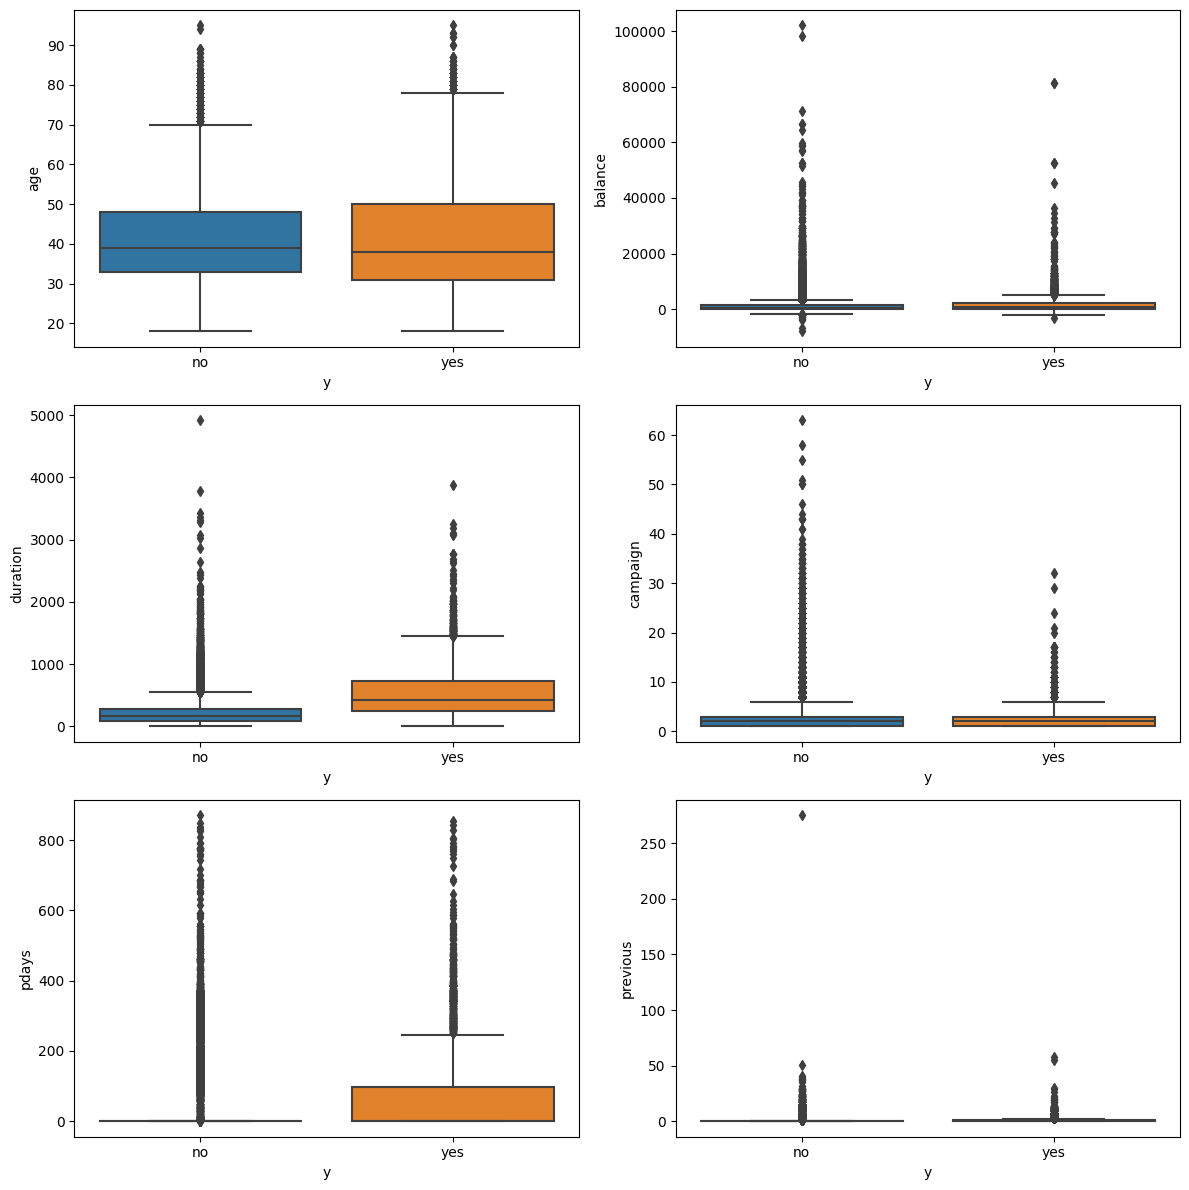

In [24]:
# Let's visualize the distribution of target / outcome (y/n) in details for each of the columns 
# using the 'hue' parameter

fig, axes = plt.subplots(3,2, figsize=(12,12))
for i in range(1,7):
    sns.boxplot(x = 'y', y = num_col[i-1], data=df, ax=axes.flat[i-1],orient = 'v')

plt.tight_layout()
plt.show()

# Distribution of duration/pdays shows clear relationship with target outcome (y/n)

In [25]:
# Let's confirm if the 'yes' and 'no' subsets of different categorical columns have the same variance
# based on Levene test

# NULL HYPOTHESIS (H0) - Target groups (yes/no) have equal variances
# ALTERNATE (H1) - Target groups (yes/no) have unequal variances

from scipy.stats import levene

for i in range(1,7):
    samp1 = df[df['y']=='no'][num_col[i-1]]
    samp2 = df[df['y']=='yes'][num_col[i-1]]
    stat, pval = levene(samp1, samp2)
    print('For column',num_col[i-1],', p value for Levene test =',pval)
    
# We can see that for each numerical column, p value is much less than 0.01
# Therefore we reject the null , i.e variances are not the same

For column age , p value for Levene test = 2.420857912510469e-133
For column balance , p value for Levene test = 5.020129382284311e-15
For column duration , p value for Levene test = 0.0
For column campaign , p value for Levene test = 8.220318168029953e-33
For column pdays , p value for Levene test = 3.79055331945749e-108
For column previous , p value for Levene test = 7.801830349772383e-88


In [26]:
# 2 sample t-test to confirm the relation of numerical variable with target
# NULL HYPOTHESIS (H0) - Mean of target groups (yes/no) are the same
# ALTERNATE (H1) - Mean of target groups (yes/no) are different

from scipy.stats import ttest_ind

for i in range(1,7):
    samp1 = df[df['y']=='no'][num_col[i-1]]
    samp2 = df[df['y']=='yes'][num_col[i-1]]
    tstat, pval = ttest_ind(samp1, samp2)
    print('For column',num_col[i-1],'t-stat =',tstat,'; p value =',pval/2)

For column age t-stat = -5.350255423036203 ; p value = 4.4128218459611975e-08
For column balance t-stat = -11.25043445878562 ; p value = 1.2605568459375734e-29
For column duration t-stat = -91.28943612670862 ; p value = 0.0
For column campaign t-stat = 15.599948860003781 ; p value = 5.061736821048148e-55
For column pdays t-stat = -22.151671780724012 ; p value = 1.895276659739017e-108
For column previous t-stat = -19.910901271473993 ; p value = 3.9009151749026054e-88


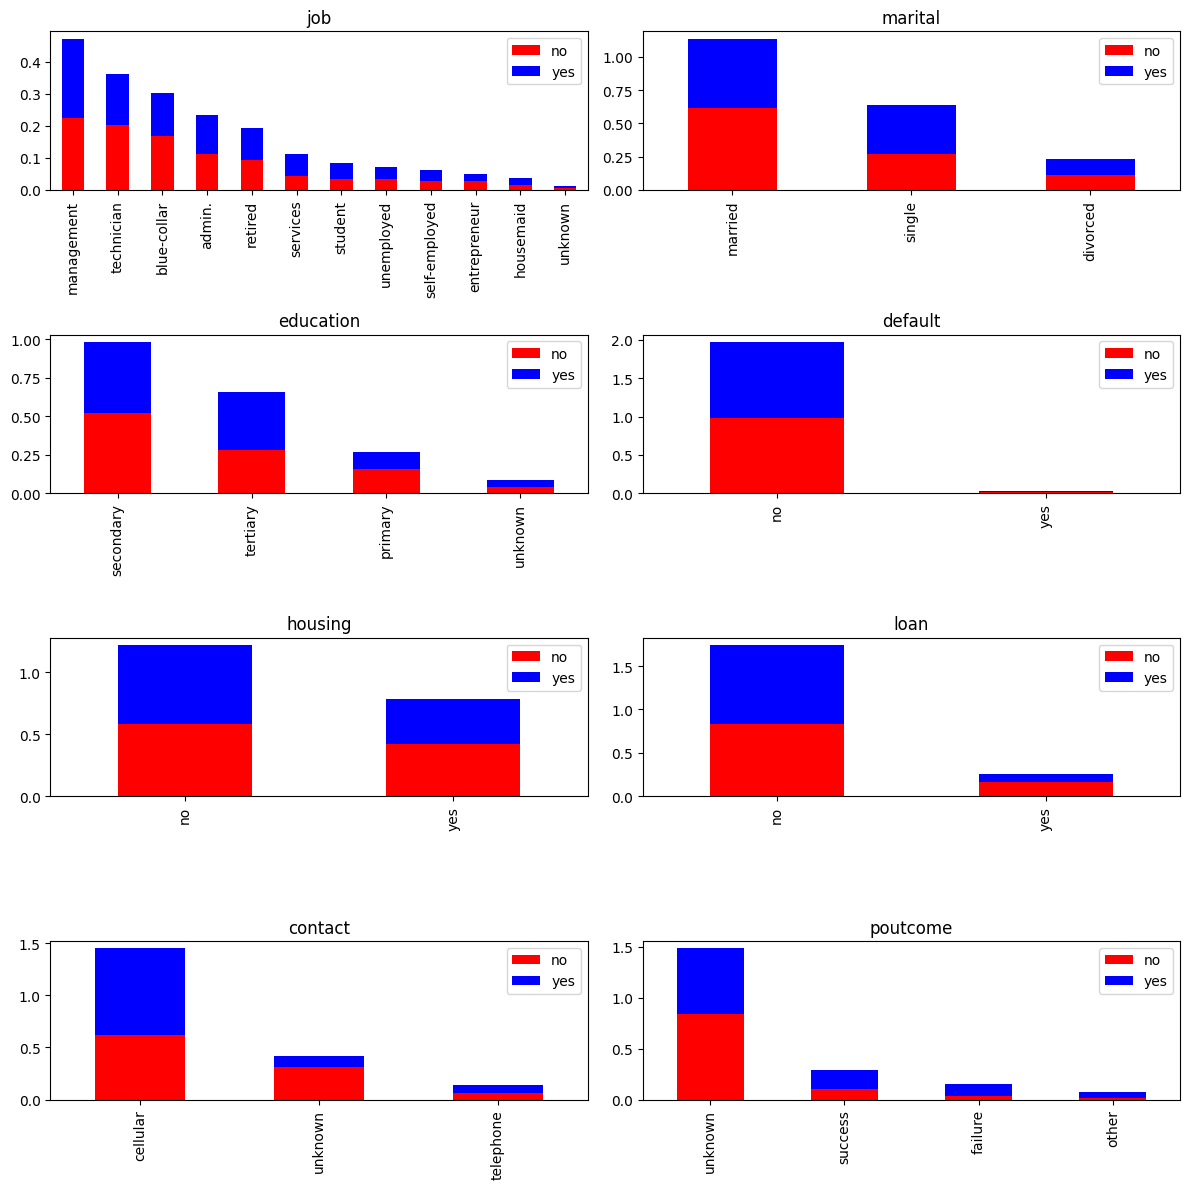

In [27]:
# Let's now check the distribution of target classes (yes/no) with respect to categorical variables

col_list = [i for i in cat_col if i not in ('day','month','y')]

fig, axes = plt.subplots(4,2, figsize=(12,12))
for i in range(1,9):
    no_count = df[df['y'] == 'no'][col_list[i-1]].value_counts(normalize=True)
    yes_count = df[df['y'] == 'yes'][col_list[i-1]].value_counts(normalize=True)
    no_count.plot(kind='bar',ax=axes.flat[i-1], color = 'r')
    yes_count.plot(kind='bar', bottom=no_count.values, ax=axes.flat[i-1], color='b')
    axes.flat[i-1].set_title("%s" %(col_list[i-1]))
    axes.flat[i-1].legend(['no','yes'], loc = 'upper right')
    
ax1 = axes.flat[0]
labels = ax1.get_xticklabels()
ax1.set_xticklabels(labels = labels, rotation=90)

plt.tight_layout()
plt.show()

In [28]:
# Again observe highly unbalanced distribution of 'yes' and 'no' outcomes in all the columns
# of given data

# FEATURE ENGINEERING

### 'PREVIOUS', 'POUTCOME' & 'PDAYS'

In [29]:
# Columns related to previous marketing campaigns - 'poutcome', 'pdays', 'previous'. 
# We habe to analyze relation between these columns in detail to make the best use of the available data.

tab1 = pd.crosstab(index=df['poutcome'], columns = df['y'], values = df['pdays'], aggfunc='mean')
tab2 = pd.crosstab(index=df['poutcome'], columns = df['y'], values = df['previous'], aggfunc='mean')

pd.concat([tab1,tab2], axis=1, keys = ['pdays','previous'])

pdays              previous          
y                 no         yes        no       yes
poutcome                                            
failure   242.783329  232.679612  2.866682  3.103560
other     233.485323  210.700326  4.011089  4.000000
success   166.412758  161.540900  3.013133  3.109407
unknown    -0.966789   -0.914944  0.000417  0.000886

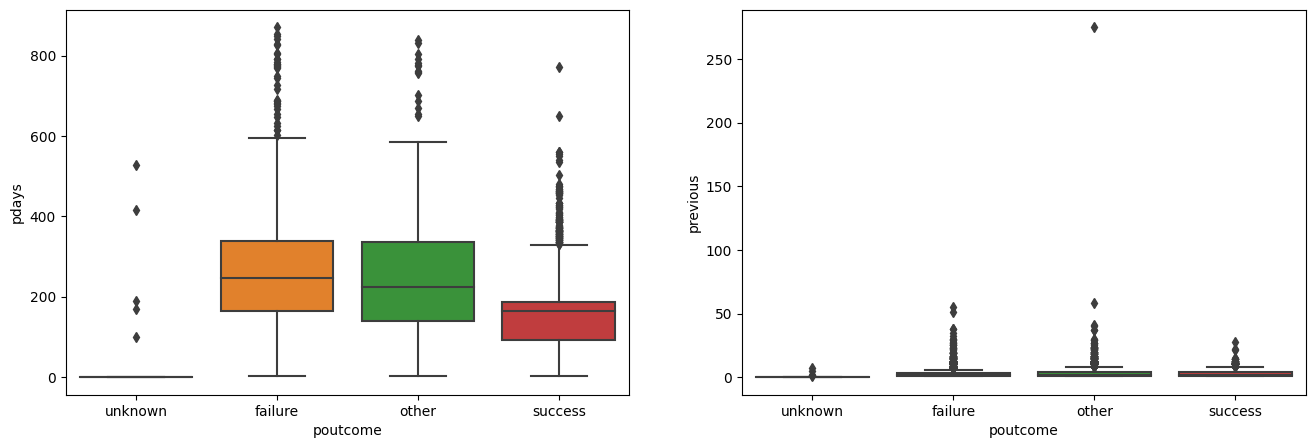

In [30]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.boxplot(x = df['poutcome'], y = df['pdays'], ax=axes.flat[0])
sns.boxplot(x = df['poutcome'], y = df['previous'],ax=axes.flat[1])
plt.show()

# For poutcome "unknown", almost all the values of pdays = -1 and previous = 0 
# However pdays mean for 'success' is less than for 'failure' & 'other' categories
# Variation in 'previous' column is very less for the different categories

In [31]:
# same is confirmed by the below crosstab for poutcome 'unknown'

pd.crosstab(index=df[df['poutcome']=='unknown']['poutcome'], columns = [df['pdays'],df['previous']]).T

,poutcome,unknown
pdays,previous,
-1,0,36954
98,1,1
168,5,1
188,2,1
416,2,1
528,7,1


In [32]:
# Let's the analyze the correlation b/w pdays and previous in more detail. 

# Feature engineering will have to be performed to separate the '-1' values out of 
# the column to derive any further insight

df[df['pdays']==-1]['previous'].value_counts().to_frame()
df[df['previous']==0]['pdays'].value_counts().to_frame()

# 'previous' = 0 for all rows where 'pdays' == -1.and vice versa 
# It indicates that pdays and previous column have significant overlap

,pdays
-1,36954


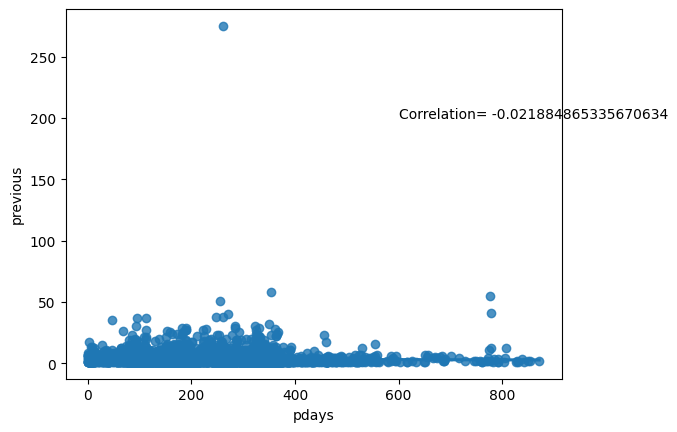

In [33]:
sns.regplot(df[df['pdays']!=-1]['pdays'], df[df['pdays']!=-1]['previous'])
plt.text(x=600, y=200, s = 'Correlation= '+str(df[df['pdays']!=-1]['pdays'].corr(df[df['pdays']!=-1]['previous'])))
plt.show()

# no correlation when you remove pdays = -1

In [34]:
# Hence we decide to remove 'pdays' and 'previous' from the features since they show high
# degree of correlation with 'poutcome' (majority common values pdays -1 = previous 0 = poutcome 'unknown')

df_num.drop(['pdays','previous'], axis=1, inplace=True)

### 'DAY' TO 'WEEK'

In [35]:
# Convert 'day' into categorical variable as follows
# 'day' 1-7 : Week 1 ; 8-14 : Week 2 ; 15-21 : Week 3; 22-28 : Week 4; 29-31 : Week 5

def week_number(x):
    if x in range(1,8): return 'Week 1'
    elif x in range(8,15): return 'Week 2'
    elif x in range(15,22): return 'Week 3'
    elif x in range(22,29): return 'Week 4'
    elif x in range(29,32): return 'Week 5'
    
df_cat['week'] = df_cat['day'].apply(week_number)
df_cat.drop(['day'], axis=1, inplace=True)
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,week
0,management,married,tertiary,no,yes,no,unknown,may,unknown,Week 1
1,technician,single,secondary,no,yes,no,unknown,may,unknown,Week 1
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,Week 1
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,Week 1
4,unknown,single,unknown,no,no,no,unknown,may,unknown,Week 1
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,Week 3
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,Week 3
45208,retired,married,secondary,no,no,no,cellular,nov,success,Week 3
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,Week 3


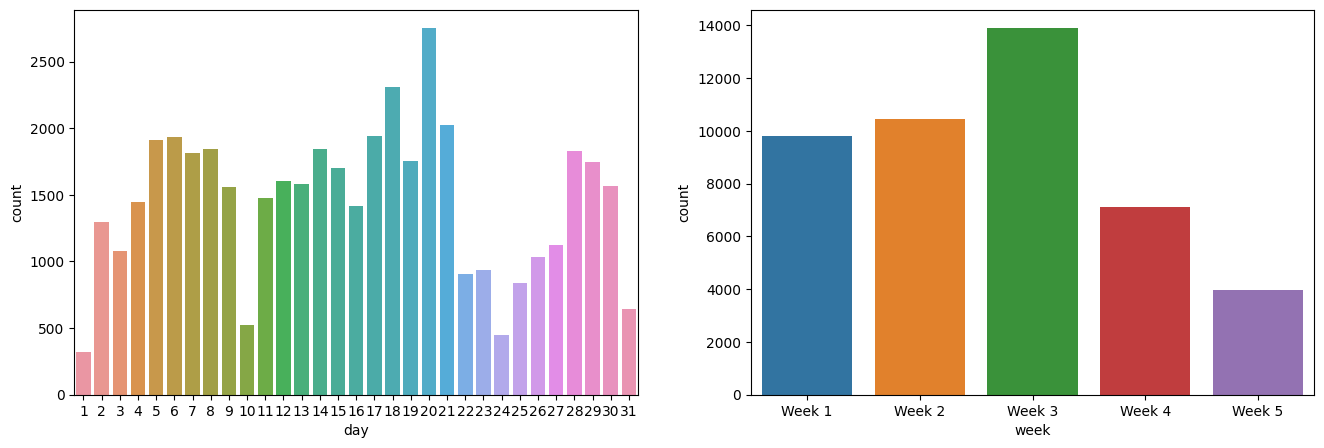

In [36]:
fig, axes = plt.subplots(1,2,figsize=(16,5))
sns.countplot(df['day'], ax=axes.flat[0])
sns.countplot(df_cat['week'], ax=axes.flat[1])
plt.show()

# DATA PREPROCESSING

### MISSING VALUE TREATMENT

In [37]:
# Perform mode imputation for 'job' and 'education' since they have low % of missing values

df_cat['job'] = df_cat['job'].replace({'unknown':df_cat['job'].mode()[0]})
df_cat['education'] = df_cat['education'].replace({'unknown': df_cat['education'].mode()[0]})

# For 'poutcome' and 'contact', we treat 'unknown' as a separate category, not missing data

### FEATURE ENCODING

In [38]:
# For binary columns - default, housing and loan, we will perform simple label encoding (0/1)

for col in ['default','housing','loan']:
    df_cat[col] = df[col].map({'no':0,'yes':1})
df_cat[['default','housing','loan']]

,default,housing,loan
0,0,1,0
1,0,1,0
2,0,1,1
3,0,1,0
4,0,0,0
...,...,...,...
45206,0,0,0
45207,0,0,0
45208,0,0,0
45209,0,0,0


In [39]:
# For education column and week column, we will go with ordinal encoding with the following sequence
# {'primary' : 0, 'secondary' : 1, 'tertiary' : 2}
# {'week 1': 0 , 'week 2': 1, 'week 3': 2, 'week 4': 3, 'week 5': 4}

df_cat['education'] = df_cat['education'].map({'primary':0,'secondary':1,'tertiary':2})
df_cat['week'] = df_cat['week'].map({'Week 1': 0 , 'Week 2': 1, 'Week 3': 2, 'Week 4': 3, 'Week 5': 4})

In [40]:
# Marital, contact and poutcome column have 3-4 categories each, so we will perform dummy encoding
# Dummy encoding for columns with more than 2 levels will improve the explainability of model

df_cat_dummies = pd.get_dummies(df_cat[['contact', 'marital','poutcome']])
df_cat = pd.concat([df_cat,df_cat_dummies], axis=1).drop(['contact', 'marital','poutcome'], axis=1)
df_cat

,job,education,default,housing,loan,month,week,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,management,2,0,1,0,may,0,0,0,1,0,1,0,0,0,0,1
1,technician,1,0,1,0,may,0,0,0,1,0,0,1,0,0,0,1
2,entrepreneur,1,0,1,1,may,0,0,0,1,0,1,0,0,0,0,1
3,blue-collar,1,0,1,0,may,0,0,0,1,0,1,0,0,0,0,1
4,blue-collar,1,0,0,0,may,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,2,0,0,0,nov,2,1,0,0,0,1,0,0,0,0,1
45207,retired,0,0,0,0,nov,2,1,0,0,1,0,0,0,0,0,1
45208,retired,1,0,0,0,nov,2,1,0,0,0,1,0,0,0,1,0
45209,blue-collar,1,0,0,0,nov,2,0,1,0,0,1,0,0,0,0,1


In [41]:
# For the month & job columns, we will perform frequency encoding (since there are 12 levels & dummy
# encoding will create too many new features)

# There are 2 types:- 
# Ordinary frequency encoding - we replace each category by its frequency in the train set
# Target encoding - we replace each category by the frequency of the required target class ('yes') for it.

In [42]:
# Perform train test split before applying frequency encoding for the remaining categorical variables
# to avoid the problem of "data leakage"

X = pd.concat([df_cat, df_num], axis=1)
y = df[['y']]

# Stratified train-test split based on target column

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14, stratify = y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(31647, 21) (13564, 21)
(31647, 1) (13564, 1)


In [43]:
job_freq = X_train['job'].value_counts(normalize=True)
month_freq = X_train['month'].value_counts(normalize=True)

X_train['job'] = X_train['job'].map(job_freq)
X_train['month'] = X_train['month'].map(month_freq)

# Do the same for test data
X_test['job'] = X_test['job'].map(job_freq)
X_test['month'] = X_test['month'].map(month_freq)
X_train

,job,education,default,housing,loan,month,week,contact_cellular,contact_telephone,contact_unknown,...,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,duration,campaign
3333,0.210257,2,0,1,0,0.304989,2,0,0,1,...,1,0,0,0,0,1,42,9,98,3
1001,0.168136,1,0,0,0,0.304989,0,0,0,1,...,1,0,0,0,0,1,50,73,93,1
11897,0.027428,2,0,0,0,0.118021,2,0,0,1,...,0,0,0,0,0,1,54,1241,17,5
31208,0.168136,1,0,1,1,0.010396,0,1,0,0,...,1,0,0,0,0,1,55,0,116,1
11098,0.221411,1,0,0,1,0.118021,2,0,0,1,...,1,0,0,0,0,1,37,1736,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37100,0.221411,1,0,1,0,0.304989,1,1,0,0,...,1,0,1,0,0,0,58,6004,133,1
41507,0.112775,1,0,0,0,0.013019,1,1,0,0,...,1,0,0,0,1,0,40,732,71,1
18332,0.221411,1,0,0,1,0.152084,4,1,0,0,...,1,0,0,0,0,1,46,870,87,2
17157,0.221411,0,0,0,1,0.152084,3,1,0,0,...,1,0,0,0,0,1,26,40,49,3


In [44]:
# Finally transform the target classes to 0 and 1

y_train['y'] = y_train['y'].map({'no':0, 'yes':1})
y_test['y'] = y_test['y'].map({'no':0, 'yes':1})

### SCALING AND OUTLIER TREATMENT

In [45]:
# Scaling of numerical columns

num_col = list(df_num.columns)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_num = pd.DataFrame(ss.fit_transform(X_train[num_col]), columns = num_col).reset_index(drop=True)
X_test_num = pd.DataFrame(ss.transform(X_test[num_col]), columns = num_col).reset_index(drop=True)

X_train_cat = X_train.drop(num_col,1).reset_index(drop=True)
X_test_cat = X_test.drop(num_col,1).reset_index(drop=True)

X_train_sc = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_sc = pd.concat([X_test_num, X_test_cat], axis=1)
X_train_sc

,age,balance,duration,campaign,job,education,default,housing,loan,month,...,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.103823,-0.455558,-0.622784,0.075809,0.210257,2,0,1,0,0.304989,...,0,0,1,0,1,0,0,0,0,1
1,0.859607,-0.433884,-0.642131,-0.569462,0.168136,1,0,0,0,0.304989,...,0,0,1,0,1,0,0,0,0,1
2,1.237499,-0.038320,-0.936204,0.721079,0.027428,2,0,0,0,0.118021,...,0,0,1,1,0,0,0,0,0,1
3,1.331972,-0.458606,-0.553135,-0.569462,0.168136,1,0,1,1,0.010396,...,1,0,0,0,1,0,0,0,0,1
4,-0.368543,0.129321,-0.746604,-0.569462,0.221411,1,0,0,1,0.118021,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.615392,1.574756,-0.487356,-0.569462,0.221411,1,0,1,0,0.304989,...,1,0,0,0,1,0,1,0,0,0
31643,-0.085123,-0.210701,-0.727258,-0.569462,0.112775,1,0,0,0,0.013019,...,1,0,0,0,1,0,0,0,1,0
31644,0.481715,-0.163965,-0.665347,-0.246827,0.221411,1,0,0,1,0.152084,...,1,0,0,0,1,0,0,0,0,1
31645,-1.407746,-0.445060,-0.812384,0.075809,0.221411,0,0,0,1,0.152084,...,1,0,0,0,1,0,0,0,0,1


In [46]:
# Since the outliers in duration and balance columns may be significant, we don't remove them

q1 = df_num.quantile(0.25); q3 = df_num.quantile(0.75)
iqr = q3-q1
df_num[((df_num>q3+1.5*iqr) | (df_num<q1-1.5*iqr)).any(axis=1)]

,age,balance,duration,campaign
34,51,10635,336,1
37,53,-3,1666,1
43,54,529,1492,1
53,42,-76,787,1
59,46,179,1778,1
...,...,...,...,...
45200,38,557,1556,4
45204,73,2850,300,1
45206,51,825,977,3
45207,71,1729,456,2


# MODELLING
### BASE MODEL FITTING

In [47]:
# We are now ready to do some modelling on our prepared dataset of X_train and y_train
# Let's start by trying to fit a logistic regression base model on our X_train & y_train set
# No scaling of numerical variable done at this point

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train_sc_cons = sm.add_constant(X_train_sc)
X_test_sc_cons = sm.add_constant(X_test_sc)

logit_model = sm.Logit(y_train, X_train_sc_cons).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.249909
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31628
Method:                           MLE   Df Model:                           18
Date:                Sat, 16 Apr 2022   Pseudo R-squ.:                  0.3075
Time:                        02:48:55   Log-Likelihood:                -7908.9
converged:                       True   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6001   5.58e+05  -1.07e-06      1.000   -1.09e+06    1.09e+06
age                   0.0497      0.023      2.138      0.032       0.004       0.095
balance               0.0632      0.018      3.477      0.001       0.028       0.099
duration              1.0431      0.019     54.130      0.000       1.005       1.081
campaign             -0.3307      0.037     -8.936      0.000      -0.403      -0.258
job                  -0.7504      0.301     -2.491      0.013      -1.341      -0.160
education             0.2020      0.034      5.911      0.000       0.135       0.269
default              -0.3130      0.206     -1.522      0.128      -0.716       0.090
housing              -0.6237      0.047    -13.236      0.000      -0.716      -0.531
loan                 -0.5722      0.070     -8.225      0.000      -0.709      -0.436
month                -2.8930      0.263    -10.996      0.000      -3.409      -2.377
week                 -0.0209      0.017     -1.209      0.227      -0.055       0.013
contact_cellular      0.0912        nan        nan        nan         nan         nan
contact_telephone     0.1568        nan        nan        nan         nan         nan
contact_unknown      -0.8481        nan        nan        nan         nan         nan
marital_divorced     -0.1951        nan        nan        nan         nan         nan
marital_married      -0.4040        nan        nan        nan         nan         nan
marital_single       -0.0010        nan        nan        nan         nan         nan
poutcome_failure     -0.7151        nan        nan        nan         nan         nan
poutcome_other       -0.4314        nan        nan        nan         nan         nan
poutcome_success      1.5748        nan        nan        nan         nan         nan
poutcome_unknown     -1.0285        nan        nan        nan         nan         nan
=====================================================================================
"""

In [48]:
pd.set_option('display.max_rows',None)
df_odds = pd.DataFrame(np.exp(logit_model.params), columns = ['odds'])
df_odds

,odds
const,0.548730
age,1.051006
balance,1.065226
duration,2.838044
campaign,0.718418
job,0.472199
education,1.223819
default,0.731236
housing,0.535942
loan,0.564296


### MODEL PERFORMANCE EVALUATION

In [49]:
pd.reset_option('display.max_rows')

# calculate the probabilties from the model
y_train_prob = logit_model.predict(X_train_sc_cons)
y_test_prob = logit_model.predict(X_test_sc_cons)

# predicted target labels setting probability threshold as 0.5

y_train_pred = y_train_prob.apply(lambda x: 0 if x<0.5 else 1)
y_test_pred = y_test_prob.apply(lambda x: 0 if x<0.5 else 1)

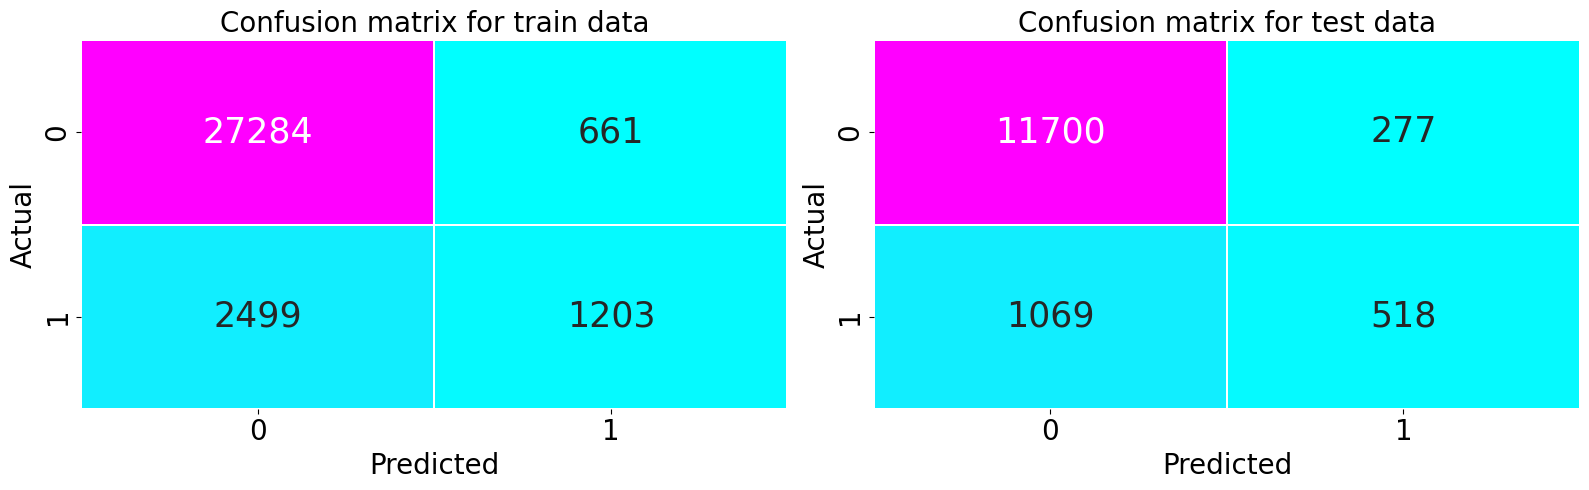

In [50]:
from sklearn.metrics import confusion_matrix

# create confusion matrices for predicted train and test labels
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# display a heat map image of the confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(16,5))
ax1 = axes.flat[0]; ax2 = axes.flat[1]
sns.heatmap(train_cm, annot = True, fmt = 'd', cmap = 'cool', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25}, ax=ax1)
ax1.set_title('Confusion matrix for train data', fontsize=20)
ax1.set_ylabel('Actual', fontsize=20); ax1.set_xlabel('Predicted', fontsize=20)
ax1.set_xticks([0.5,1.5], labels=[0,1], fontsize = 20); ax1.set_yticks([0.5,1.5],labels=[0,1], fontsize = 20)

sns.heatmap(test_cm, annot = True, fmt = 'd', cmap = 'cool', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25}, ax=ax2)
ax2.set_title('Confusion matrix for test data', fontsize=20)
ax2.set_ylabel('Actual', fontsize=20); ax2.set_xlabel('Predicted', fontsize=20)
ax2.set_xticks([0.5,1.5],labels=[0,1],fontsize = 20); ax2.set_yticks([0.5,1.5],labels=[0,1],fontsize = 20)
plt.tight_layout()
plt.show()

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Create df_scores to store the performance metrics of different models
df_scores = pd.DataFrame()

# Define the function for calculating performance scores of the models
def performance_scores(df, model, y, y_pred):
    cm = confusion_matrix(y,y_pred)
    tp = cm[1,0]; tn = cm[0,0]; fp = cm[0,1]; fn = cm[1,0]
    df.loc[model,'Accuracy'] = accuracy_score(y, y_pred)
    df.loc[model,'Precision'] = precision_score(y, y_pred)
    df.loc[model,'Recall'] = recall_score(y, y_pred)
    df.loc[model,'F1_score'] = f1_score(y, y_pred)
    df.loc[model,'Kappa_score'] = cohen_kappa_score(y, y_pred)

performance_scores(df_scores, 'Train_logistic',y_train, y_train_pred)
performance_scores(df_scores, 'Test_logistic',y_test, y_test_pred)
df_scores

,Accuracy,Precision,Recall,F1_score,Kappa_score
Train_logistic,0.900149,0.645386,0.324959,0.432267,0.384004
Test_logistic,0.900767,0.651572,0.326402,0.434929,0.387059


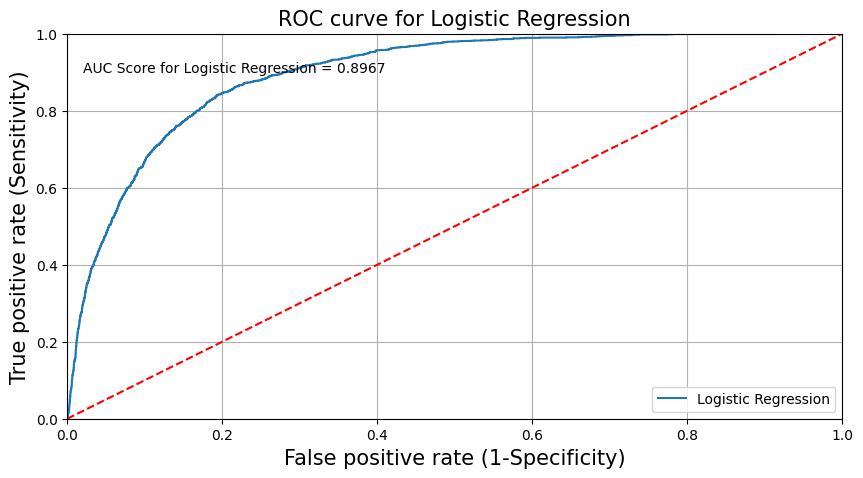

In [52]:
# Plot the ROC curve for out base model

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss

def plot_roc_curve(model_name, y_test, y_test_prob, ax):
    plot_roc_curve.counter +=1
    if plot_roc_curve.counter == 1:
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.0])
        # plot the straight line showing worst prediction for the model
        ax.plot([0, 1], [0, 1],'r--') 

        ax.set_xlabel('False positive rate (1-Specificity)', fontsize = 15)
        ax.set_ylabel('True positive rate (Sensitivity)', fontsize = 15)
        
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    ax.plot(fpr, tpr, label=model_name)
    ax.set_title('ROC curve for {}'.format(model_name), fontsize = 15)
    ax.legend(loc = 'lower right')

    # add the AUC score to the plot
    offset = 0.1*plot_roc_curve.counter
    auc_score = round(roc_auc_score(y_test, y_test_prob), 4)
    ax.text(x = 0.02, y = 1-offset, s = 'AUC Score for {0} = {1}'.format(model_name,auc_score))
    plt.grid(True)
plot_roc_curve.counter = 0

fig, ax = plt.subplots(1, figsize=(10,5))
plot_roc_curve('Logistic Regression',y_test, y_test_prob, ax)                                    
plt.show()

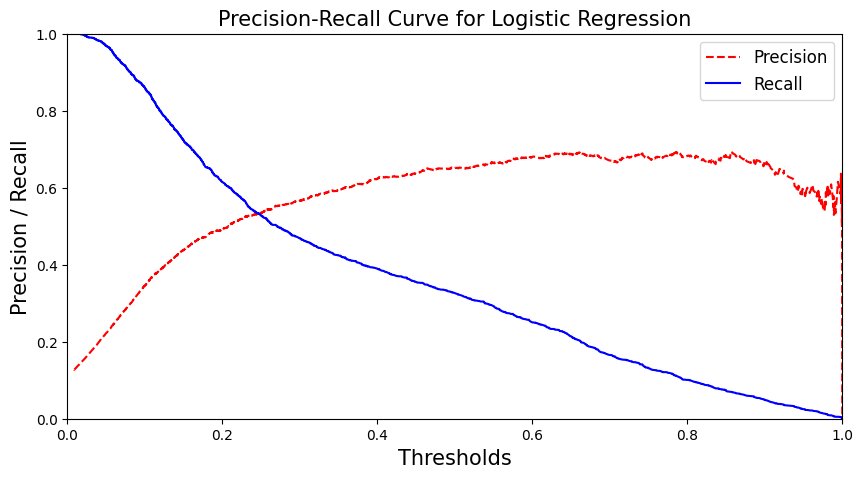

In [53]:
# Plot the precision - recall curve for the result obtained

from sklearn.metrics import precision_recall_curve

def plot_precision_recall(model_name, y_test, y_test_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precision[:-1], 'r--', label = 'Precision')
    plt.plot(thresholds, recall[:-1], 'b', label = 'Recall')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.title('Precision-Recall Curve for {}'.format(model_name), fontsize = 15)
    plt.xlabel('Thresholds', fontsize = 15)
    plt.ylabel('Precision / Recall', fontsize = 15)
    plt.legend(loc = 'best', fontsize = 12)

    plt.show()
plot_precision_recall('Logistic Regression', y_test, y_test_prob)

In [54]:
# Finding the optimum threshold value by comparing performance metrics

threshold = [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]
score_card = pd.DataFrame()

for value in threshold:
    y_test_pred = [0 if x<value else 1 for x in y_test_prob]
    performance_scores(score_card, value, y_test, y_test_pred)
score_card
score_card.style.highlight_max(color = 'lightblue')

# Based on score card, we can choose a threshold of 0.1-0.2 as optimum
# The threshold obtained reflects the imbalance existing in our target variable

,Accuracy,Precision,Recall,F1_score,Kappa_score
0.1,0.793129,0.345657,0.860113,0.493136,0.391578
0.2,0.880566,0.491688,0.614997,0.546473,0.478682
0.3,0.895827,0.566311,0.468179,0.512591,0.454859
0.4,0.901135,0.623992,0.390044,0.480031,0.428601
0.5,0.900767,0.651572,0.326402,0.434929,0.387059
0.6,0.898555,0.680961,0.250158,0.365899,0.323360
0.7,0.892804,0.670077,0.165091,0.264914,0.229263
0.8,0.889339,0.683761,0.100819,0.175728,0.150174
0.9,0.885801,0.661017,0.049149,0.091496,0.076540


In [55]:
# Optimum threshold based on Youden's index

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
youdens_table = pd.DataFrame({'Threshold':thresholds,'TPR':tpr,'FPR':fpr})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending=False).reset_index(drop=True)

youdens_table

# Optimum threshold is 0.12

,Threshold,TPR,FPR,Difference
0,0.107516,0.84184,0.194373,0.647467
1,0.107197,0.84247,0.195207,0.647263
2,0.107872,0.84058,0.193454,0.647126
3,0.107521,0.84121,0.194289,0.646921
4,0.107521,0.84121,0.194373,0.646837
...,...,...,...,...
1922,0.999502,0.00189,0.000250,0.001640
1923,2.000000,0.00000,0.000000,0.000000
1924,0.000062,1.00000,1.000000,0.000000
1925,1.000000,0.00000,0.000083,-0.000083


In [56]:
# Optimum threshold based on cost method

cut_off=np.arange(0,1,0.01)
cutoff_cost=pd.DataFrame(columns=["cut-off"])

def calculate_cost(y_true,y_pred,cost_fn,cost_fp):
    cm=confusion_matrix(y_true,y_pred)
    return cm[1,0]*cost_fn+cm[0,1]*cost_fp

for val in cut_off:
    y_pred_cost = [0 if x<val else 1 for x in y_test_prob]
    total_cost = calculate_cost(y_test,y_pred_cost,3.5,2)
    cutoff_cost = cutoff_cost.append({"cut-off":val,"total cost":total_cost},ignore_index=True)
cutoff_cost.sort_values(by='total cost').head(10)

# Optimal cut-off from cost method is 0.32

,cut-off,total cost
23,0.23,4041.5
27,0.27,4062.0
22,0.22,4069.5
24,0.24,4072.0
26,0.26,4073.5
25,0.25,4079.5
28,0.28,4084.5
30,0.30,4092.0
31,0.31,4096.5
21,0.21,4096.5


In [57]:
# Predicted target labels setting optimum probability threshold

y_train_pred = y_train_prob.apply(lambda x: 0 if x<0.2 else 1)
y_test_pred = y_test_prob.apply(lambda x: 0 if x<0.2 else 1)

# Add the optimum scores to our scores dataframe
performance_scores(df_scores, 'Train_logistic_optimum', y_train, y_train_pred)
performance_scores(df_scores, 'Test_logistic_optimum', y_test, y_test_pred)

df_scores

,Accuracy,Precision,Recall,F1_score,Kappa_score
Train_logistic,0.900149,0.645386,0.324959,0.432267,0.384004
Test_logistic,0.900767,0.651572,0.326402,0.434929,0.387059
Train_logistic_optimum,0.880494,0.491308,0.610751,0.544557,0.476709
Test_logistic_optimum,0.880566,0.491688,0.614997,0.546473,0.478682


### ASSUMPTIONS OF LOGISTIC REGRESSION

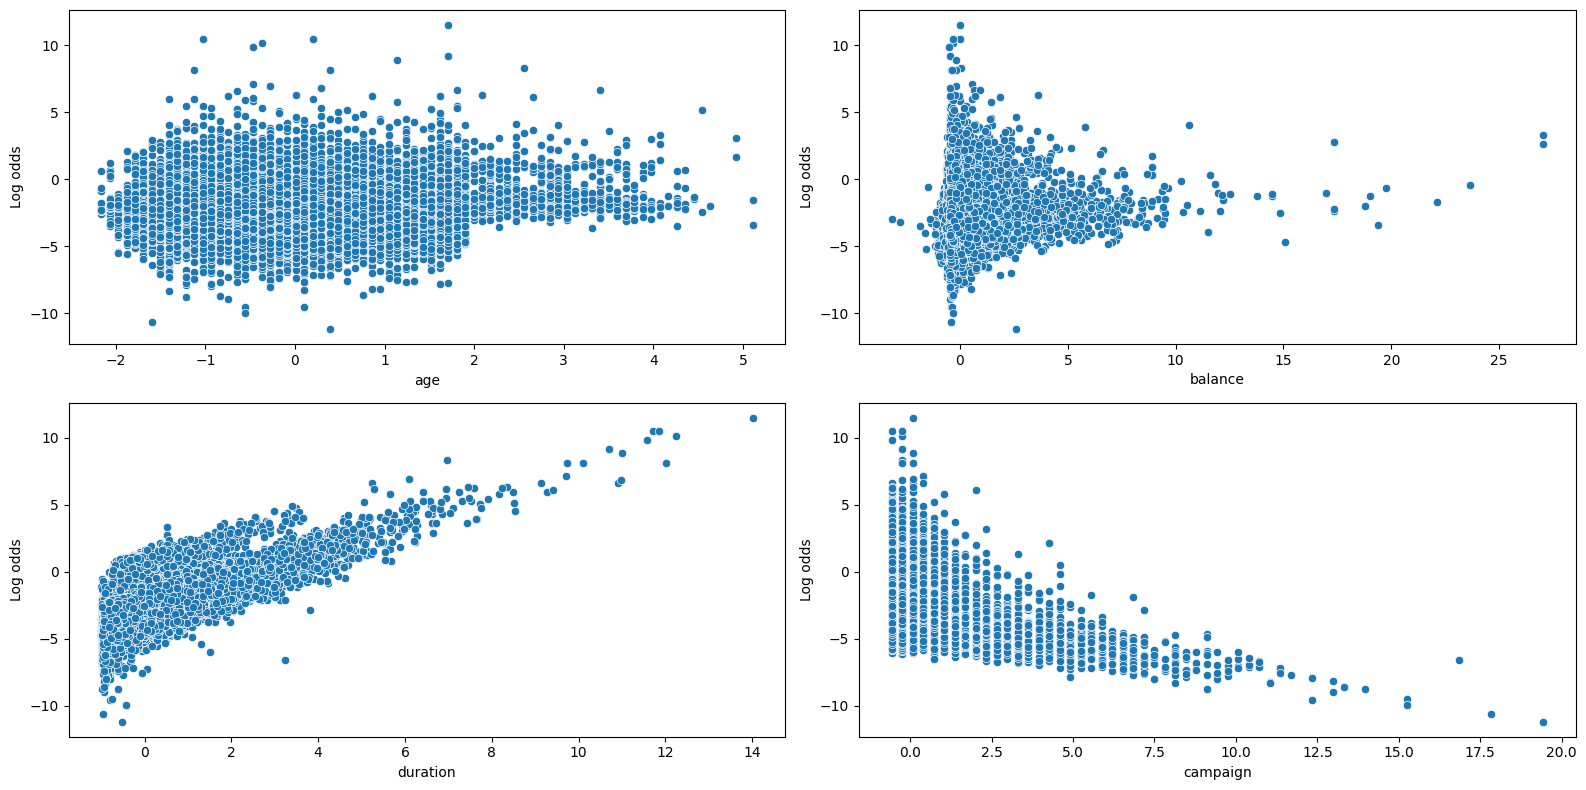

In [58]:
# CHECK FOR LINEARITY ASSUMPTION

y_train_log_odds = np.log(y_train_prob / (1-y_train_prob))
fig, axes = plt.subplots(2,2, figsize=(16,8))
i=0
for col in X_train_num.columns:
    sns.scatterplot(X_train_sc[col], y_train_log_odds, ax=axes.flat[i])
    i=i+1
    
for i in range(4): axes.flat[i].set_ylabel('Log odds')
plt.tight_layout()
plt.show()

In [59]:
# CHECKING FOR MULTICOLLINEARITY OF DATA
# Check the variance inflation factor (VIF) for numerical columns 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
df_num = X[num_col]
vif["Features"] = df_num.columns
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
0,age,2.836364
2,duration,1.884081
3,campaign,1.714891
1,balance,1.212325


In [60]:
# For categorical features, we use a chi-square independence test

cat_col = list(df_cat.columns)
df_cat_corr = pd.DataFrame(columns = ['column 1','column 2','chi-stat','p value'])
k=0
for i in range(len(cat_col)):
    for j in range(i+1,len(cat_col)):
        col1 = cat_col[i]; col2 = cat_col[j]
        table = pd.crosstab(X_train_cat[col1], X_train_cat[col2])
        stat, pvalue, df, exp = stats.chi2_contingency(table)
        df_cat_corr.loc[k,'column 1'] = col1
        df_cat_corr.loc[k,'column 2'] = col2
        df_cat_corr.loc[k,'chi-stat'] = stat
        df_cat_corr.loc[k,'p value'] = pvalue
        k=k+1
df_cat_corr[df_cat_corr['p value']>0.05]

,column 1,column 2,chi-stat,p value
28,education,poutcome_other,5.86122,0.0533646
31,default,housing,0.0242559,0.876236
34,default,week,3.81248,0.431978
40,default,marital_single,0.114635,0.734928
51,housing,marital_divorced,0.23196,0.630074
62,loan,contact_unknown,0.861396,0.353348
66,loan,poutcome_failure,0.116705,0.732636
67,loan,poutcome_other,1.71229,0.190689
84,week,marital_divorced,9.07692,0.0592053
93,contact_cellular,marital_divorced,2.85456,0.0911152


### DECISION TREE

In [61]:
# Load and prepare the data for modelling
# Data preparation involves dummy encoding of categorical variables & scaling of numerical variables (not done here)

num_col = ['age','balance','duration','campaign','pdays','previous']
cat_col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']

df = pd.read_csv('F:/PGP-DSE/Capstone/Dataset/bank/bank-full.csv', sep = ';')
df_num = df[num_col]
df_cat = df[cat_col]
df_cat_dummies = pd.get_dummies(df_cat)
X = pd.concat([df_num, df_cat_dummies], axis=1)
y = df['y'].replace({'no':0, 'yes':1})

In [62]:
# Stratified shuffle split to balance the target classes in train & test data

# from sklearn.model_selection import StratifiedShuffleSplit
# strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3)
# train_idx, test_idx = next(strat_split.split(X, y))

# X_train = X.take(list(train_idx), axis=0)
# y_train = y.take(list(train_idx), axis=0)
# X_test = X.take(list(test_idx), axis=0)
# y_test = y.take(list(test_idx), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14, stratify = y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(31647, 51) (13564, 51)
(31647,) (13564,)


In [63]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
dt_model = dtc.fit(X_train, y_train)
y_train_pred = dt_model.predict(X_train)
print(classification_report(y_train,y_train_pred))

# Overfitting in train set is observed which can be reduced using various pruning methods

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27945
           1       1.00      1.00      1.00      3702

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



In [64]:
y_test_pred = dt_model.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11977
           1       0.49      0.50      0.49      1587

    accuracy                           0.88     13564
   macro avg       0.71      0.71      0.71     13564
weighted avg       0.88      0.88      0.88     13564



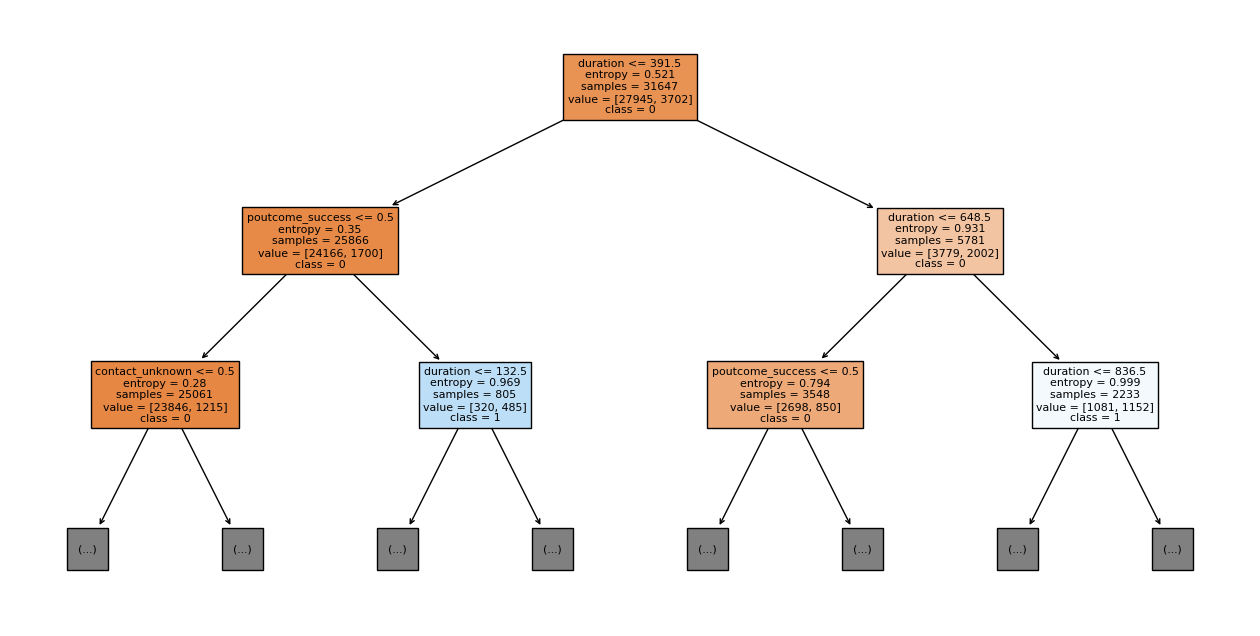

In [65]:
# Plot the decision tree

from sklearn import tree
fig = plt.figure(figsize=(16,8))

tree.plot_tree(dt_model,feature_names = X_train.columns, class_names=["0","1"], max_depth=2, filled=True)
plt.show()

### ENSEMBLE MODELS

In [66]:
# We will try two different models - Random Forest (bagging) & XGBoost (Gradient Boosting)
# to compare the performancs.

rfc = RandomForestClassifier(n_estimators = 100, random_state=15)
rfc_model = rfc.fit(X_train, y_train)
y_train_pred = rfc_model.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27945
           1       1.00      1.00      1.00      3702

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



In [67]:
y_test_pred = rfc_model.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.65      0.39      0.49      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564



In [68]:
xgb = XGBClassifier(n_estimators = 100, random_state=15, importance_type='total_gain', verbosity = 0)
xgb_model = xgb.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27945
           1       0.89      0.72      0.80      3702

    accuracy                           0.96     31647
   macro avg       0.93      0.86      0.89     31647
weighted avg       0.96      0.96      0.96     31647



In [69]:
y_test_pred = xgb_model.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11977
           1       0.63      0.51      0.56      1587

    accuracy                           0.91     13564
   macro avg       0.79      0.73      0.76     13564
weighted avg       0.90      0.91      0.90     13564



In [70]:
# We create dataframe to store the prediction scores of different models

df_scores_models = pd.DataFrame()

logreg = LogisticRegression(solver='liblinear')
logit_model = logreg.fit(X_train_sc, y_train)

performance_scores(df_scores_models,'Logistic Regression', y_test, logit_model.predict(X_test_sc))
performance_scores(df_scores_models,'Decision Tree', y_test, dt_model.predict(X_test))
performance_scores(df_scores_models,'Random Forest', y_test, rfc_model.predict(X_test))
performance_scores(df_scores_models,'XGboost', y_test, xgb_model.predict(X_test))

In [71]:
# Comparison of different models

df_scores_models

,Accuracy,Precision,Recall,F1_score,Kappa_score
Logistic Regression,0.900767,0.651955,0.325772,0.434454,0.386631
Decision Tree,0.880492,0.489480,0.498425,0.493912,0.426165
Random Forest,0.903937,0.650424,0.386894,0.485184,0.435956
XGboost,0.907992,0.633781,0.505986,0.562719,0.512027


# MODEL VALIDATION & FINETUNING

In [72]:
# In order to find out how well the results will generalize, we have to use cross validation to
# calculate and compare the prediction scores.
# Calculate the metrics for all 4 models used so far (Logistic Regression, DT, Random Forest & XGboost)

models_dict = {'Logistic Regression': logit_model, 'Decision Tree': dt_model, 
               'Random Forest': rfc_model, 'XGBoost': xgb_model}

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer
kappa = make_scorer(cohen_kappa_score)

In [73]:
df_cross_val = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1_score', 'kappa'])
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=10)

# Define the function for calculating cross validated scores
def cross_validate_model(df, model_name, X_train, y_train):
    model = models_dict[model_name]
    accuracy_scores = cross_val_score(model, X_train, y_train, cv = cv, scoring ='accuracy')
    precision_scores = cross_val_score(model, X_train, y_train, cv = cv, scoring ='precision')
    recall_scores = cross_val_score(model, X_train, y_train, cv = cv, scoring ='recall')
    f1_scores = cross_val_score(model, X_train, y_train, cv = cv, scoring ='f1')
    kappa_scores = cross_val_score(model, X_train, y_train, cv = cv, scoring = kappa)
    mean_scores = [accuracy_scores.mean(), precision_scores.mean(), recall_scores.mean(), f1_scores.mean(), kappa_scores.mean()]
    df_cross_val.loc[model_name,:] = mean_scores

for model_name in models_dict:
    cross_validate_model(df_cross_val, model_name, X_train, y_train)
df_cross_val

# We can see that Xgboost has by far the best performance

,accuracy,precision,recall,f1_score,kappa
Logistic Regression,0.901128,0.648994,0.337925,0.44406,0.395707
Decision Tree,0.875502,0.468352,0.475141,0.471608,0.401067
Random Forest,0.904983,0.667738,0.374388,0.479498,0.431769
XGBoost,0.906911,0.633023,0.485953,0.54967,0.498777


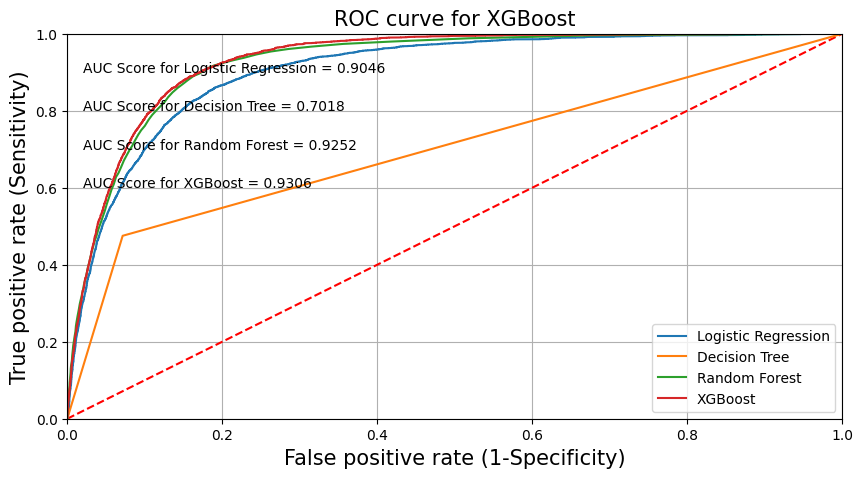

In [74]:
# Plot & compare the ROC curves

from sklearn.model_selection import cross_val_predict

plot_roc_curve.counter = 0
fig, ax = plt.subplots(1, figsize=(10,5))
for model_name in models_dict:
    model = models_dict[model_name]
    y_pred_prob = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')
    plot_roc_curve(model_name, y_train, y_pred_prob[:,1], ax)

plt.show()

In [75]:
## We find that XGBoost has the highest baseline performance in terms of recall and AUC score.
## Hence, we can proceed with the XGBoost model for finetuning
## ROC curve of Decision Tree Model seems to show the effect of overfitting

### HYPERPARAMETER TUNING

In [77]:
from sklearn.model_selection import GridSearchCV

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=10)
params = {'n_estimators' : range(100,1001,50),
              'learning_rate' : np.arange(0.1,1,0.1),
              'class_weight': [{0: w, 1: 1-w} for w in np.arange(0.1,0.6,0.1)],
              'max_depth' : np.arange(3,40,1),
              'min_samples_split' : np.arange(3,20,1),
              'min_samples_leaf' : np.arange(3,20,1)}

# xgb_grid = GridSearchCV(xgb_model, params, scoring='roc_auc', cv=cv)
# xgb_grid.fit(X_train, y_train)
# xgb_grid.best_params_

In [80]:
best_params = {'n_estimators': 350,
 'min_samples_split': 13,
 'min_samples_leaf': 10,
 'max_depth': 39,
 'learning_rate': 0.1,
 'class_weight': {0: 0.2, 1: 0.8}}

In [81]:
# Build the model based on optimum hyperparameters

xgb_best = XGBClassifier(random_state=15, importance_type='total_gain', verbosity=0, **best_params)
xgb_best.fit(X_train, y_train)
y_test_pred = xgb_best.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11977
           1       0.63      0.49      0.55      1587

    accuracy                           0.91     13564
   macro avg       0.78      0.73      0.75     13564
weighted avg       0.90      0.91      0.90     13564



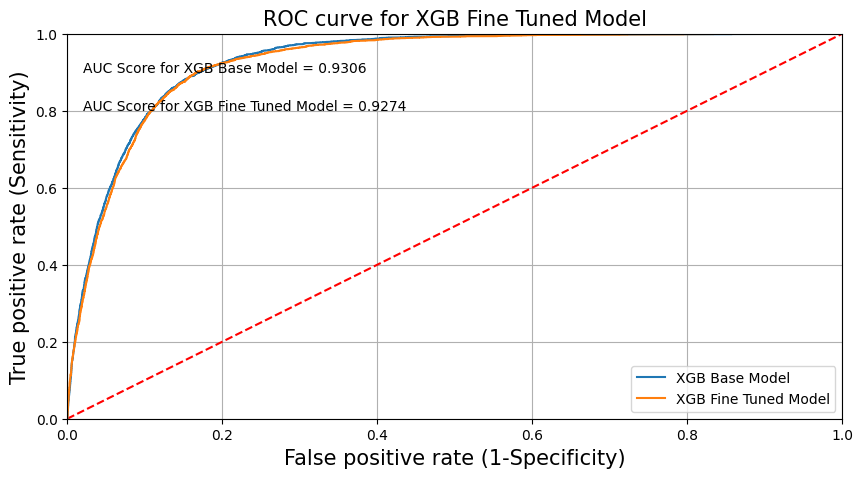

In [82]:
# Compare the ROC curves and AUC scores for fine-tuned model with base model

fig, ax = plt.subplots(1, figsize=(10,5))
plot_roc_curve.counter = 0
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=10)

models_dict = {'XGB Base Model': xgb_model, 'XGB Fine Tuned Model':xgb_best}
for model_name in models_dict:
    model = models_dict[model_name]
    y_pred_prob = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')
    plot_roc_curve(model_name, y_train, y_pred_prob[:,1], ax)
plt.show()

In [83]:
# Choosing the optimum threshold for final model

threshold = np.arange(0,1,0.05)
score_card = pd.DataFrame()
y_test_prob = xgb_best.predict_proba(X_test)[:,1]
for value in threshold:
    y_test_pred = [0 if x<value else 1 for x in y_test_prob]
    performance_scores(score_card, value, y_test, y_test_pred)
score_card.sort_values(by='F1_score', ascending=False).head()

,Accuracy,Precision,Recall,F1_score,Kappa_score
0.05,0.884179,0.503145,0.806553,0.619705,0.555675
0.10,0.893763,0.533579,0.730939,0.616857,0.556926
0.15,0.898555,0.553256,0.690611,0.614350,0.556764
0.20,0.899366,0.561056,0.642722,0.599119,0.541882
0.25,0.901135,0.572353,0.613106,0.592029,0.535857


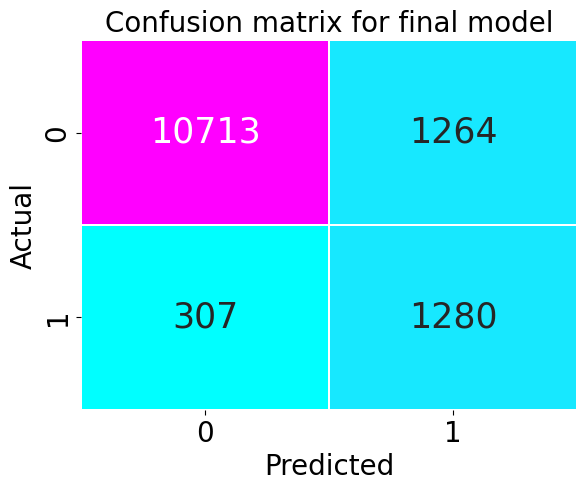

In [84]:
# Final prediction results for fine-tuned model

y_test_pred = [0 if x<0.05 else 1 for x in y_test_prob]
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot = True, fmt = 'd', cmap = 'cool', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.title('Confusion matrix for final model', fontsize=20)
plt.ylabel('Actual', fontsize=20); plt.xlabel('Predicted', fontsize=20)
plt.xticks([0.5,1.5],labels=[0,1],fontsize = 20); 
plt.yticks([0.5,1.5],labels=[0,1],fontsize = 20)
plt.show()

# MODEL INTERPRETATION

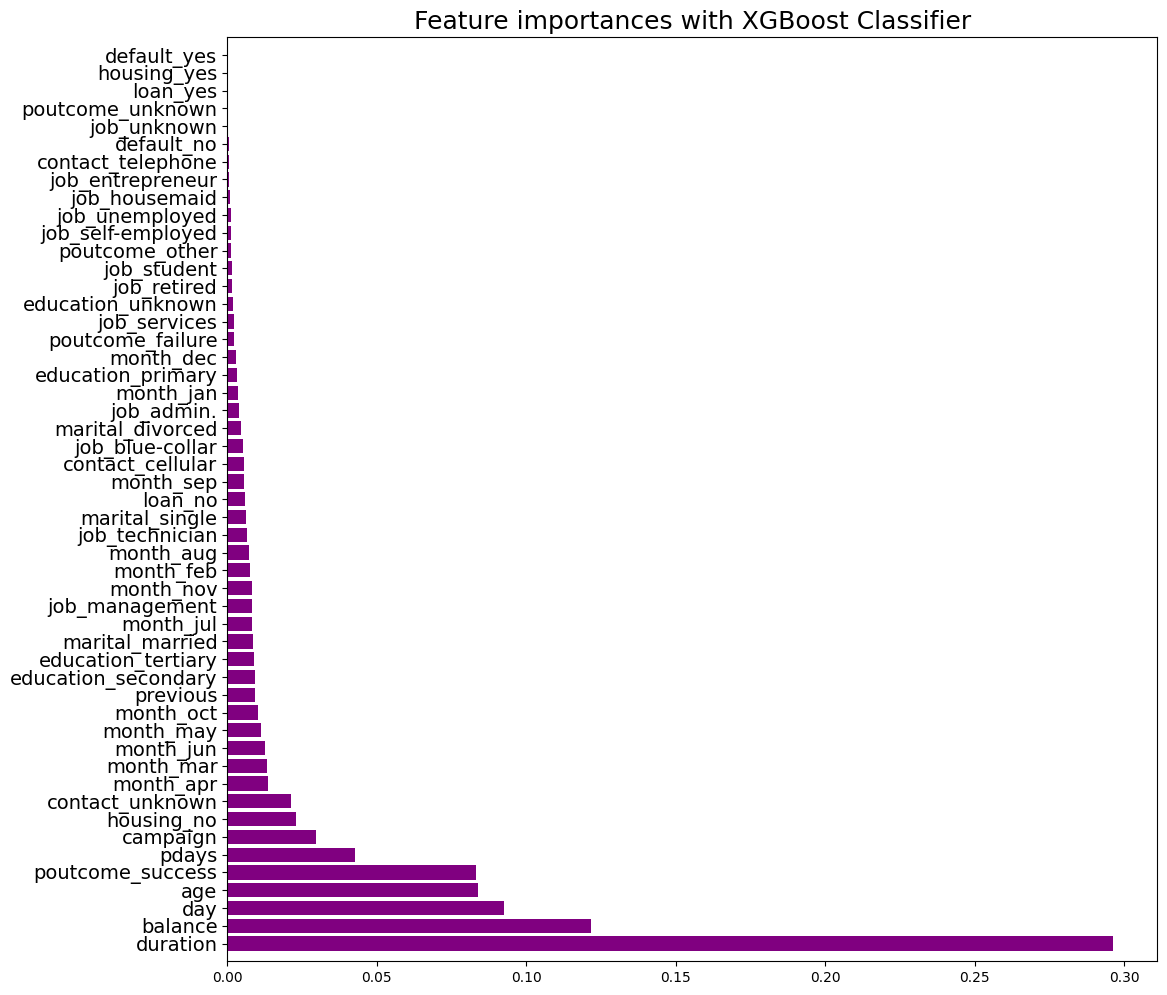

In [85]:
# Feature importance gives a measure of how significant a feature is for classifying the data. Here the metric
# used is total gain of information due to a feature.

features_imp = pd.DataFrame()
features_imp['features'] = X_train.columns
features_imp['importances'] = xgb_best.feature_importances_
features_imp.sort_values(by = 'importances', ascending=False, inplace=True)

# Plot the feature ranking

plt.figure(figsize=(12,12))
plt.barh(features_imp['features'], features_imp['importances'], color='purple',  align="center")

plt.title("Feature importances with XGBoost Classifier", fontsize=18)
plt.yticks(range(len(features_imp)), features_imp['features'], rotation='horizontal',fontsize=14)
plt.ylim([-1, len(features_imp)])
plt.show()

In [86]:
features_imp[:20].sum(numeric_only=True)

# Top 20 features account for more than 90% of the feature importance

importances    0.907856
dtype: float64

In [97]:
# Plot partial dependency plots for top 6 features

from sklearn.inspection import PartialDependenceDisplay
imp_feat = features_imp['features'][:6].values
pd_plot = PartialDependenceDisplay.from_estimator(xgb_best, X_test, imp_feat) 

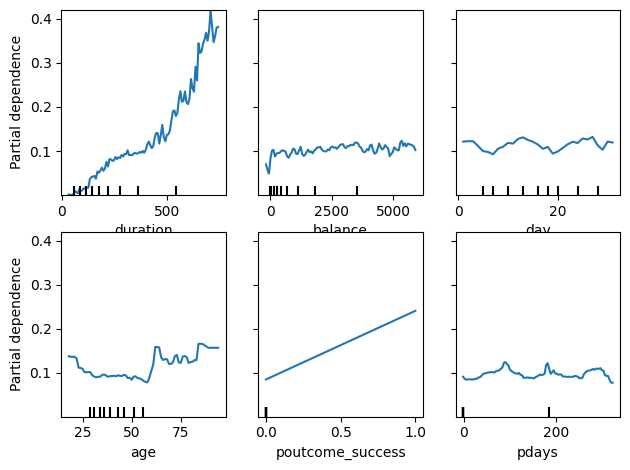

In [98]:
plt.tight_layout()
plt.show()

# CONCLUSION

## 1. Our model can predict 80% of the clients who are likely to subscribe with a 50% precision rate.
## 2. Duration and poutcome-success are the best predictors for success in customer subscribing to term deposit. Hence, the bank is advised to give high priority to the customers who had subscribed in the previous campaign. Also, increasing the duration of marketing calls can be done by making the calls more interactive and detail-oriented.
## 3. Since having an outstanding loan is found to be negatively correlated with subscribing to term deposit, the bank is advised to give a lower priority to such customers.  